<a href="https://colab.research.google.com/github/kastrahl/Assessments/blob/main/Trade_Reporting_data_Analysis_drop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = "https://raw.githubusercontent.com/malikjb35/pythonTest/main/Testdata.csv"
df = pd.read_csv(url)
print(df.head())

cols=['tradeId','regulator','version','assetClass','clDateTime','clStatus','cflag','eFlag','cDateTime','method','rate','expirationDate','eventT','mType','Timestamp','quantity','seller','endDate','sType','Product','price','terminationDate','party','PartyId','transactionType','Reporting Status']
df.columns=cols


In [ ]:
print(df.info())

In [ ]:
#unique values to check irrelevant columns
df.nunique()

In [ ]:
# - cleaning 1 dropping single unique value columns, price column
df = df.drop(['regulator','assetClass','price'], axis=1)
df.head(5)

Checking for values and types to check for errors

In [ ]:
unique_values = df[['version','eventT','quantity', 'clStatus', 'eFlag','method','cflag','mType','seller','sType','Product','party','PartyId','transactionType','Reporting Status']].apply(lambda x: x.unique())
print(unique_values)
#transaction type object not standardised, quantity 1,asxa,1

In [115]:
# - cleaning 2 transaction standardisation
# Convert values in the 'transactionType' column to uppercase
df['transactionType'] = df['transactionType'].str.upper()

# Print unique values in the 'transactionType' column after standardization
print("Unique values in the 'transactionType' column after standardization:")
print(df['transactionType'].unique())

Unique values in the 'transactionType' column after standardization:
['EXIT' 'TRADE']


In [116]:
# - cleaning 3 fix quantity two different occurance count of '1'
# Convert all values in the 'quantity' column to strings
df['quantity'] = df['quantity'].astype(str)

# Print unique values in the 'quantity' column after conversion
print("Unique values in the 'quantity' column after conversion:")
print(df['quantity'].unique())

Unique values in the 'quantity' column after conversion:
['1' 'asxa']


In [117]:
# Count occurrences of each unique value in the 'quantity' column
quantity_counts = df['quantity'].value_counts()

# Print the count of rows with each unique value
print("Number of rows with each unique value in the 'quantity' column:")
print(quantity_counts)

Number of rows with each unique value in the 'quantity' column:
1       49999
asxa        1
Name: quantity, dtype: int64


In [120]:
# - cleaning 4  Drop rows where the value in the 'quantity' column is 'asxa'
df = df[df['quantity'] != 'asxa']
# Verify that the row has been dropped
print("Number of rows after dropping 'asxa' value:", len(df))

Number of rows after dropping 'asxa' value: 49999


dropping quantity due to having only one unique value after data standardisation

In [134]:
df = df.drop(['quantity'], axis=1)


Standardizing entire DataFrame to uppercase where column is string type (object)

In [ ]:
# Iterate over columns in the DataFrame
for column in df.columns:
    # Apply standardization operation to each column
    if df[column].dtype == 'object':  # Check if column is of object type (i.e., string)
        df[column] = df[column].str.upper()  # Convert values to uppercase

        # Additional standardization operations can be applied here

# Display the standardized DataFrame
print(df.head())

In [144]:
unique_values = df[['version','eventT','quantity', 'clStatus', 'eFlag','method','cflag','mType','seller','sType','Product','party','PartyId','transactionType','Reporting Status']].apply(lambda x: x.unique())
print(unique_values)

KeyError: "['quantity'] not in index"

In [123]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49999 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tradeId           49999 non-null  int64  
 1   version           49999 non-null  int64  
 2   clDateTime        49999 non-null  object 
 3   clStatus          49999 non-null  bool   
 4   cflag             49999 non-null  object 
 5   eFlag             49999 non-null  bool   
 6   cDateTime         49999 non-null  object 
 7   method            49999 non-null  object 
 8   rate              49999 non-null  float64
 9   expirationDate    49999 non-null  object 
 10  eventT            49999 non-null  object 
 11  mType             49999 non-null  object 
 12  Timestamp         49999 non-null  object 
 13  quantity          49999 non-null  object 
 14  seller            49999 non-null  object 
 15  endDate           49999 non-null  object 
 16  sType             49999 non-null  object

In [124]:
#check and remove duplicate rows
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 23)


In [126]:
#cleaning - 5
df = df.dropna(subset=['terminationDate'])

# Verify that null terminationDate rows have been dropped
print("Number of rows after dropping null terminationDate rows:", len(df))

Number of rows after dropping null terminationDate rows: 43791


In [129]:
# - cleaning 6  changing object to date time for datetime columns
#convert dates into datetime
date_columns = ['clDateTime', 'cDateTime', 'expirationDate', 'Timestamp', 'endDate', 'terminationDate']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

# Find rows with problematic datetime values
problematic_rows = df[df[date_columns].isnull().any(axis=1)]

# Display the problematic rows
print("Rows with problematic datetime values:")
print(problematic_rows)

Rows with problematic datetime values:
Empty DataFrame
Columns: [tradeId, version, clDateTime, clStatus, cflag, eFlag, cDateTime, method, rate, expirationDate, eventT, mType, Timestamp, quantity, seller, endDate, sType, Product, terminationDate, party, PartyId, transactionType, Reporting Status]
Index: []

[0 rows x 23 columns]


In [130]:
row_number_22 = df.iloc[22]
print("Row number:")
print(row_number_22)

Row number:
tradeId                                           26
version                                            1
clDateTime          2023-11-27 08:50:11.571000+00:00
clStatus                                        True
cflag                                         ONEWAY
eFlag                                          False
cDateTime           2023-02-07 12:10:33.854000+00:00
method                                    ELECTRONIC
rate                                       5910.4294
expirationDate      2023-07-27 00:42:02.890000+00:00
eventT                                   COMPRESSION
mType                                       SNAPSHOT
Timestamp           2023-01-19 09:04:21.928000+00:00
quantity                                           1
seller                                        PARTY2
endDate             2023-04-27 09:40:55.209000+00:00
sType                                       PHYSICAL
Product                                      FORWARD
terminationDate     2023-12-04 19:

Checking where unique values are readable

In [137]:
#check datatypes
df.dtypes

tradeId                           int64
version                           int64
clDateTime          datetime64[ns, UTC]
clStatus                           bool
cflag                            object
eFlag                              bool
cDateTime           datetime64[ns, UTC]
method                           object
rate                            float64
expirationDate      datetime64[ns, UTC]
eventT                           object
mType                            object
Timestamp           datetime64[ns, UTC]
seller                           object
endDate             datetime64[ns, UTC]
sType                            object
Product                          object
terminationDate     datetime64[ns, UTC]
party                            object
PartyId                           int64
transactionType                  object
Reporting Status                 object
dtype: object

In [80]:
#converting "clDateTime", "cDateTime", "expirationDate", "Timestamp", "endDate", and "terminationDate"
#to datetime data type using the pd.to_datetime()
#converting led to errors
#date_columns = ['clDateTime', 'cDateTime', 'expirationDate', 'Timestamp', 'endDate', 'terminationDate']
#for col in date_columns:
#    df[col + '_converted'] = pd.to_datetime(df[col], errors='coerce')

# Find rows with problematic datetime values
#problematic_rows = df[df[date_columns].isnull().any(axis=1)]

# Display the problematic rows
#print("Rows with problematic datetime values:")
#print(problematic_rows)

check the entire DataFrame for outliers

In [138]:
import numpy as np

# Select numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Iterate over numerical columns to check for outliers
for column in numerical_columns:
    # Calculate z-scores for the column
    z_scores = (df[column] - df[column].mean()) / df[column].std()

    # Define threshold for identifying outliers (e.g., z-score > 3 or < -3)
    threshold = 3

    # Find outliers based on z-score
    outliers = df[abs(z_scores) > threshold]

    # Print column name and rows with outliers
    print("Outliers in column '{}':".format(column))
    print(outliers)

Outliers in column 'tradeId':
Empty DataFrame
Columns: [tradeId, version, clDateTime, clStatus, cflag, eFlag, cDateTime, method, rate, expirationDate, eventT, mType, Timestamp, seller, endDate, sType, Product, terminationDate, party, PartyId, transactionType, Reporting Status]
Index: []

[0 rows x 22 columns]
Outliers in column 'version':
Empty DataFrame
Columns: [tradeId, version, clDateTime, clStatus, cflag, eFlag, cDateTime, method, rate, expirationDate, eventT, mType, Timestamp, seller, endDate, sType, Product, terminationDate, party, PartyId, transactionType, Reporting Status]
Index: []

[0 rows x 22 columns]
Outliers in column 'rate':
Empty DataFrame
Columns: [tradeId, version, clDateTime, clStatus, cflag, eFlag, cDateTime, method, rate, expirationDate, eventT, mType, Timestamp, seller, endDate, sType, Product, terminationDate, party, PartyId, transactionType, Reporting Status]
Index: []

[0 rows x 22 columns]
Outliers in column 'PartyId':
Empty DataFrame
Columns: [tradeId, versi

In [131]:
df.nunique()

tradeId             43791
version                 9
clDateTime          43791
clStatus                2
cflag                   6
eFlag                   2
cDateTime           43791
method                  8
rate                43782
expirationDate      43791
eventT                  9
mType                   4
Timestamp           43790
quantity                1
seller                  2
endDate             43791
sType                   2
Product                 4
terminationDate     43791
party                   5
PartyId                 5
transactionType         2
Reporting Status        7
dtype: int64

In [135]:
print(df.isnull().sum())

tradeId             0
version             0
clDateTime          0
clStatus            0
cflag               0
eFlag               0
cDateTime           0
method              0
rate                0
expirationDate      0
eventT              0
mType               0
Timestamp           0
seller              0
endDate             0
sType               0
Product             0
terminationDate     0
party               0
PartyId             0
transactionType     0
Reporting Status    0
dtype: int64


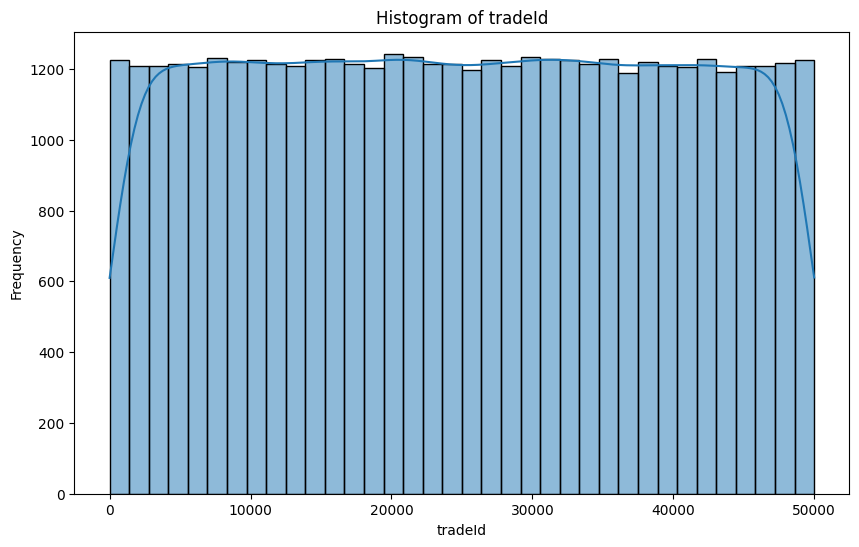

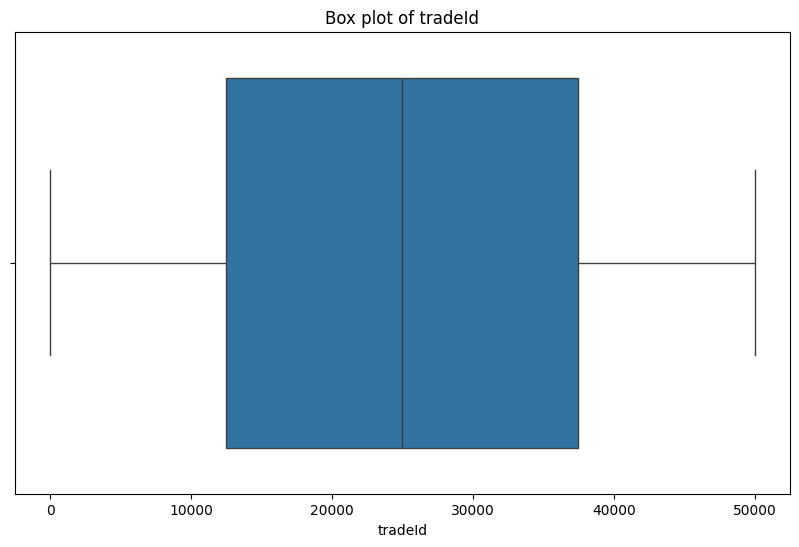

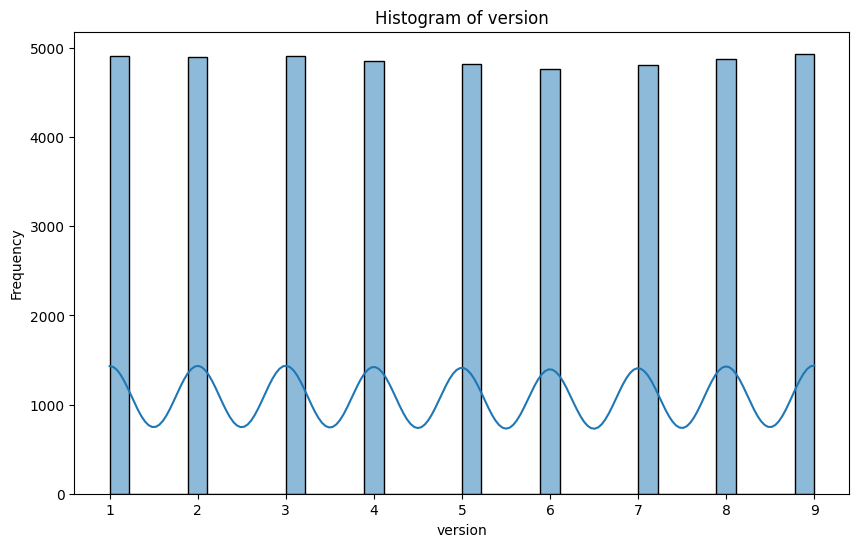

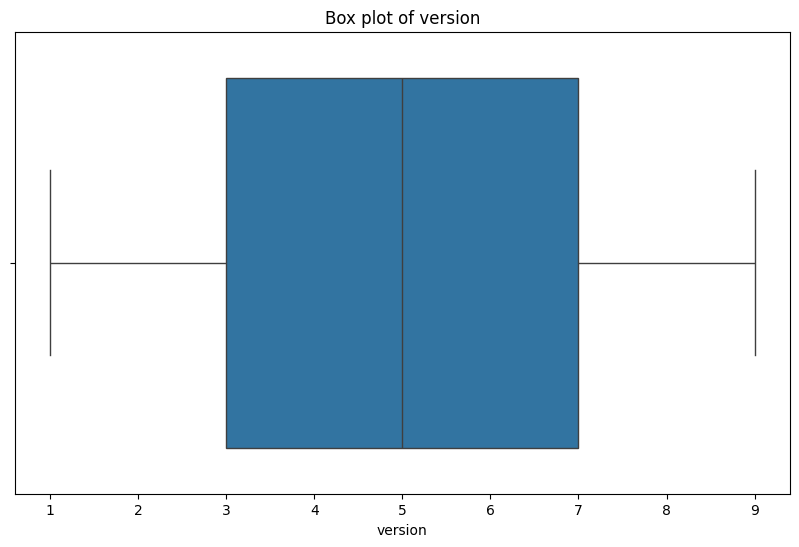

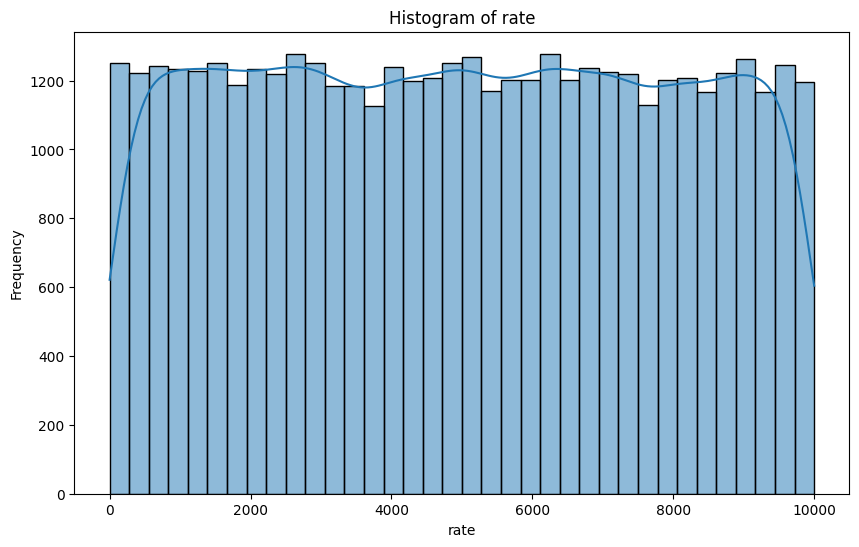

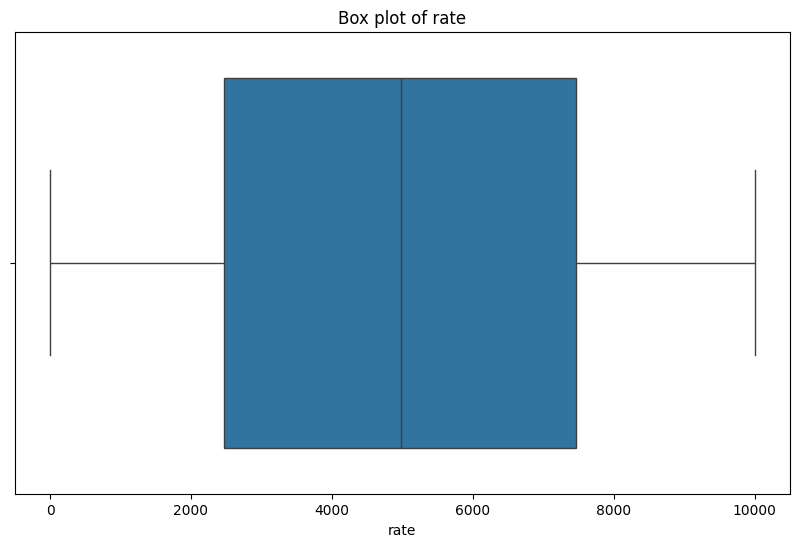

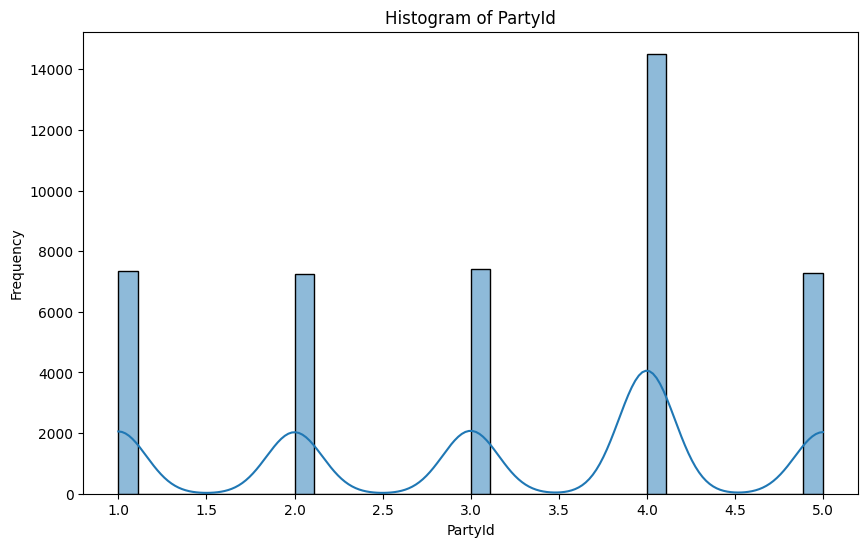

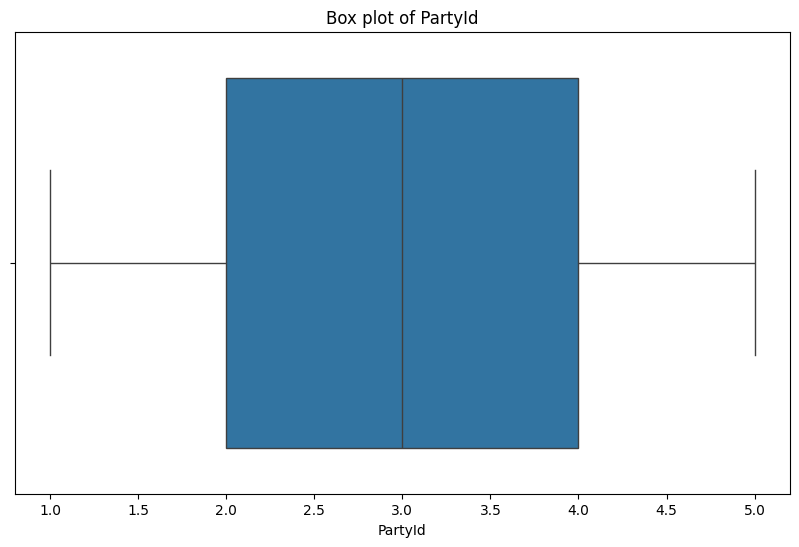

In [147]:

# Numerical columns for outlier detection
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Loop through numerical columns and create visualizations
for column in numerical_columns:
    # Create histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

    # Create box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.xlabel(column)
    plt.show()

# continue with EDA
data cleaning done with standardisation, handling missing values by dropping values of terminationDate and price column due to excessesive empty data

In [140]:
numerical_stats = df.describe()
print(numerical_stats)

            tradeId       version          rate       PartyId
count  43791.000000  43791.000000  43791.000000  43791.000000
mean   24979.522231      4.994337   4979.449255      3.162157
std    14422.869703      2.591300   2890.625860      1.343576
min        1.000000      1.000000      0.630700      1.000000
25%    12495.500000      3.000000   2473.493700      2.000000
50%    24953.000000      5.000000   4976.305100      3.000000
75%    37455.500000      7.000000   7468.071950      4.000000
max    49999.000000      9.000000   9999.865100      5.000000


In [141]:
# Frequency distribution of categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(column)
    print(df[column].value_counts())
    print()

cflag
ONEWAY              12179
UNCOLLATERALIZED    12174
FULLY               12173
F                    2449
UN                   2410
OW                   2406
Name: cflag, dtype: int64

method
ELECTRONIC       9251
NONELECTRONIC    9169
NN-ELECTRONIC    9123
NOTCONFIRMED     8983
E                1879
NE               1816
NC               1793
NON              1777
Name: method, dtype: int64

eventT
TERMINATION        5005
TRADE              4941
EXERCISE           4906
AMENDMENT          4872
PARTIALEXERCISE    4863
ERROR              4814
NOVATIONTRADE      4813
COMPRESSION        4797
NOVATION           4780
Name: eventT, dtype: int64

mType
SNAPSHOT    18291
REALTIME    18235
S            3660
R            3605
Name: mType, dtype: int64

seller
PARTY2    22058
PARTY1    21733
Name: seller, dtype: int64

sType
PHYSICAL    21933
CASH        21858
Name: sType, dtype: int64

Product
SWAP       36538
FORWARD     3531
OPTION      2856
CASH         866
Name: Product, dtype: int64

par

<ipython-input-142-05f2f09e33fc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


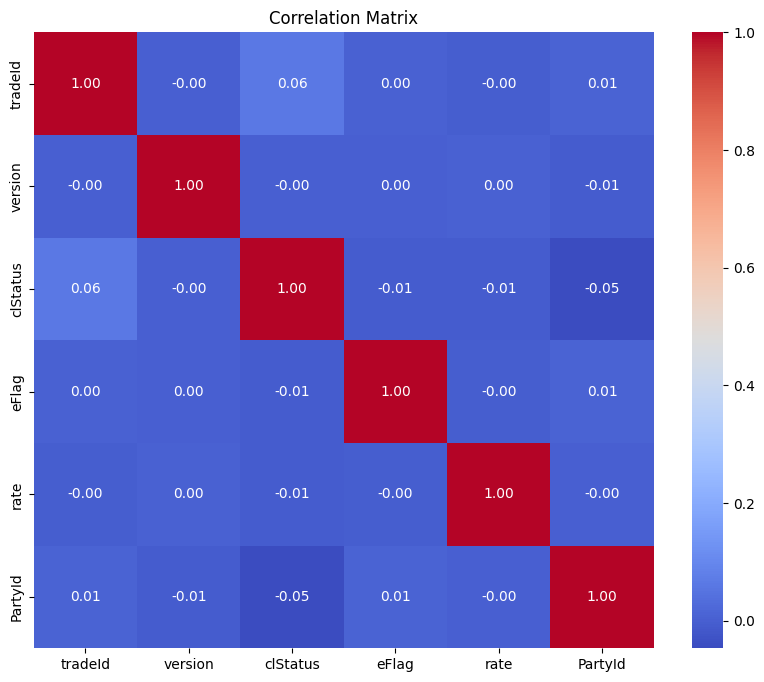

In [142]:

# Compute pairwise correlation
correlation_matrix = df.corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [136]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
           tradeId   version  clStatus     eFlag      rate   PartyId
tradeId   1.000000 -0.000376  0.063366  0.003022 -0.002088  0.007981
version  -0.000376  1.000000 -0.001173  0.000336  0.004245 -0.009614
clStatus  0.063366 -0.001173  1.000000 -0.005795 -0.008206 -0.046435
eFlag     0.003022  0.000336 -0.005795  1.000000 -0.002711  0.009110
rate     -0.002088  0.004245 -0.008206 -0.002711  1.000000 -0.000908
PartyId   0.007981 -0.009614 -0.046435  0.009110 -0.000908  1.000000


<ipython-input-136-a33ef0abbebc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [145]:
unique_values = df[['version','eventT', 'clStatus', 'eFlag','method','cflag','mType','seller','sType','Product','party','PartyId','transactionType','Reporting Status']].apply(lambda x: x.unique())
print(unique_values)

version                                   [1, 9, 8, 3, 2, 6, 7, 4, 5]
eventT              [ERROR, NOVATIONTRADE, EXERCISE, TRADE, AMENDM...
clStatus                                                [True, False]
eFlag                                                   [False, True]
method              [NONELECTRONIC, NOTCONFIRMED, ELECTRONIC, NON,...
cflag                    [FULLY, ONEWAY, F, UNCOLLATERALIZED, UN, OW]
mType                                      [REALTIME, SNAPSHOT, S, R]
seller                                               [PARTY1, PARTY2]
sType                                                [CASH, PHYSICAL]
Product                                 [SWAP, FORWARD, CASH, OPTION]
party                        [PARTYZ, PARTYX, PARTYK, PARTYY, PARTYL]
PartyId                                               [1, 4, 2, 5, 3]
transactionType                                         [EXIT, TRADE]
Reporting Status    [FAILED ACK, ACK, PROCESSING ERROR, ACKNOWLEDG...
dtype: object


<ipython-input-146-4be880c3a0d5>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_encoded.corr()


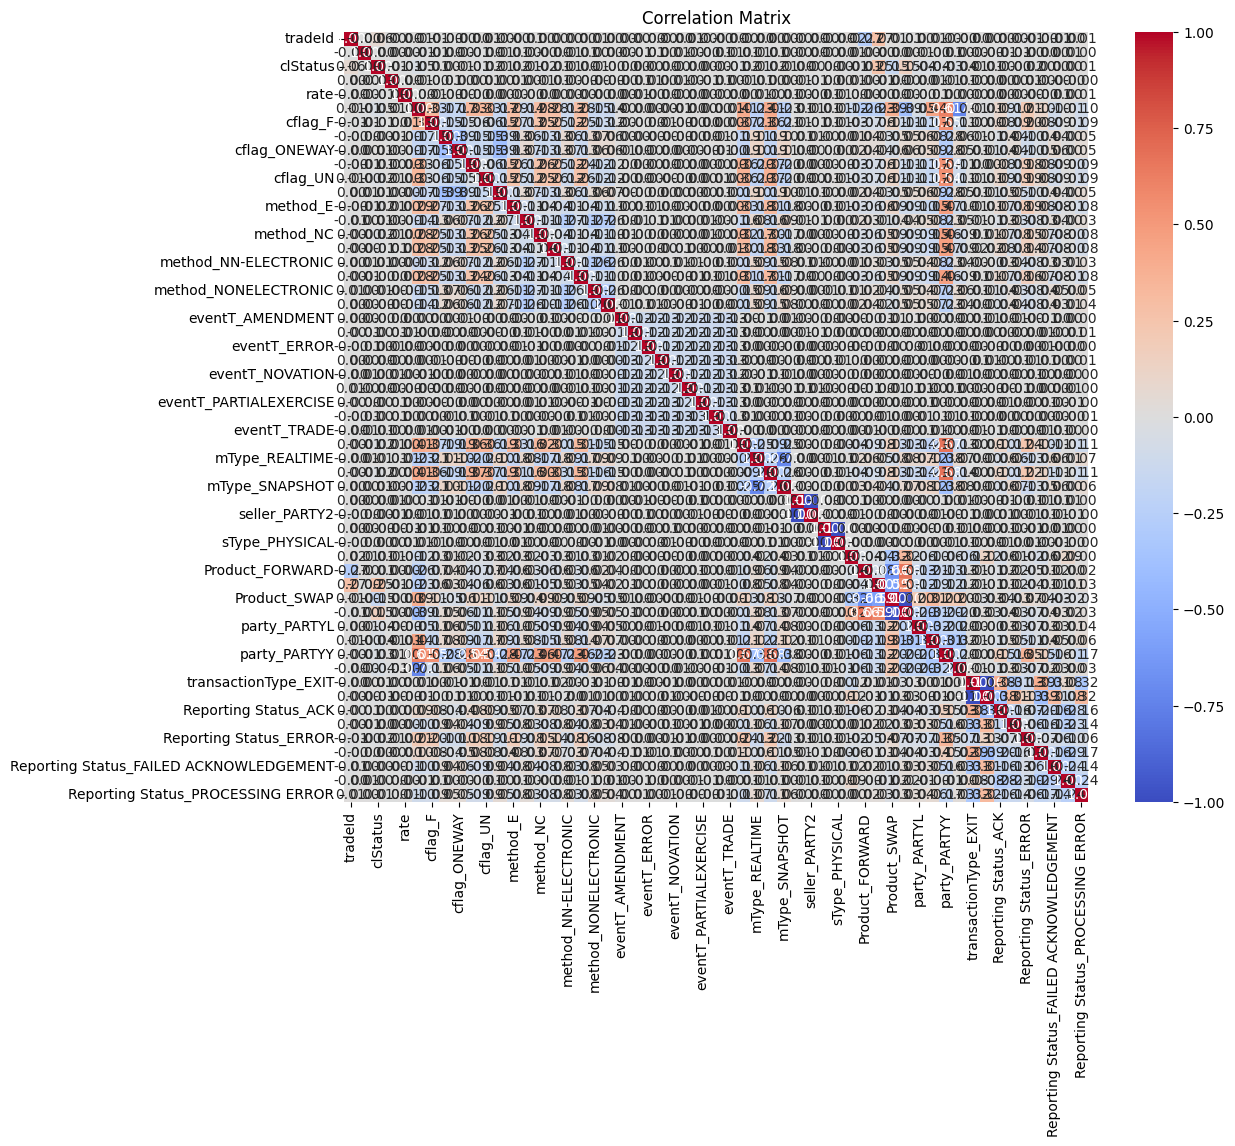

In [146]:
# Convert categorical variables into numerical format using one-hot encoding
df_encoded = pd.get_dummies(df)

# Compute correlation matrix
correlation_matrix = df_encoded.corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()